C:\Users\Gowtham\AppData\Local\Temp\ipykernel_14708\276299291.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


📊 Sales Summary from MySQL:
    order_id   revenue
0    B-26055  100951.0
1    B-25973   64222.0
2    B-25955   42906.0
3    B-25798   38896.0
4    B-25858   30437.0
..       ...       ...
495  B-25982      13.0
496  B-25788      12.0
497  B-25707       8.0
498  B-25758       8.0
499  B-26095       6.0

[500 rows x 2 columns]

✅ Exported SQL result to 'sales_summary.csv'


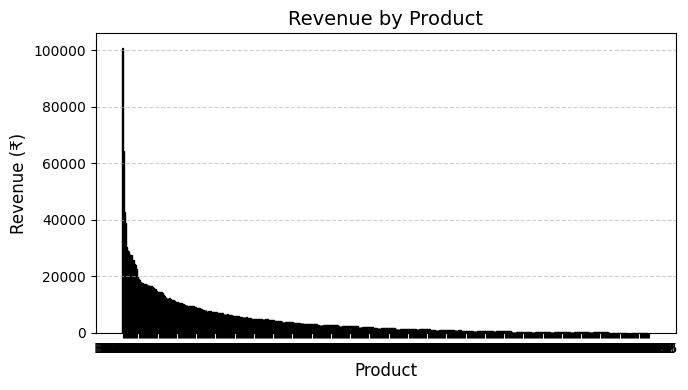

In [ ]:

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",          
    user="root",               
    password="Vanikumari@1432",  
    database="commerce"   
)

query = """
SELECT
    order_id,
    SUM(quantity * amount) AS revenue
FROM order_details
GROUP BY order_id
ORDER BY revenue DESC;
"""


df = pd.read_sql(query, conn)

print("📊 Sales Summary from MySQL:")
print(df)

df.to_csv("sales_summary.csv", index=False)
print("\n✅ Exported SQL result to 'sales_summary.csv'")

plt.figure(figsize=(7,4))
plt.bar(df['order_id'], df['revenue'], color='teal', edgecolor='black')
plt.title("Revenue by Product", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Revenue (₹)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

